In [5]:
# let's try to plot the loop
include("foamLia/foamLia.jl")
using foamLia
using PyPlot

INFO: Loading help data...


In [6]:
baseCase = OpenFoam("/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase");

 in OrderedDict at deprecated.jl:26
 in create_defaultControlDict at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:83
 in OpenFoam at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:450
 in include_string at loading.jl:97
 in execute_request_0x535c5df2 at /Users/andyreagan/.julia/v0.3/IJulia/src/execute_request.jl:157
 in eventloop at /Users/andyreagan/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340
 in OrderedDict at deprecated.jl:26
 in create_defaultFvSchemes at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:106
 in OpenFoam at /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/foamLia.jl:450
 in include_string at loading.jl:97
 in execute_request_0x535c5df2 at /Users/andyreagan/.julia/v0.3/IJulia/src/execute_request.jl:157
 in eventloop at /Users/andyreagan/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340
 in OrderedDict at deprecated.jl:26
 in create_defaultFvSchemes at /Users/a

In [7]:
initCase(baseCase,"foamLia/test/juliabase/");

/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/system exists
/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/constant/polyMesh exists
/Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0 exists
copying over base case
copying foamLia/test/juliabase//Allrun to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/Allrun
copying foamLia/test/juliabase//0/alphat to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/alphat
copying foamLia/test/juliabase//0/p to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/p
copying foamLia/test/juliabase//0/p_rgh to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/p_rgh
copying foamLia/test/juliabase//0/T to /Users/andyreagan/work/2014/2014-11foamLab-julia/foamLia/test/testPlotCase/0/T
copying foamLia/test/juliabase//0/U to /Users/andyreagan/work/2014/2014-11foamLab-julia/fo

In [50]:
faces,cells = readMesh(baseCase);
println("reshaping mesh")
points,indices = reshapeMesh(baseCase);

reshaping mesh


In [9]:
baseCase.fullMesh

OrderedDict{String,Any} with 5 entries:
  "points"      => [-0.0001 0.0001 -0.0001 0.0001 -0.0001 0.0001 -0.0001 0.0001…
  "faces"       => [3 83 1 5 85 3 7 87 5 9 89 7 11 91 9 13 93 11 15 95 13 17 97…
  "owner"       => [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10…
  "cellFaces"   => [1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61…
  "cellCenters" => [1.1293772630057337e-21 1.1293772630057337e-21 1.12937726300…

In [10]:
size(baseCase.fullMesh["points"])

(3,82000)

In [11]:
size(baseCase.fullMesh["faces"])

(4,161000)

In [12]:
size(baseCase.fullMesh["cellFaces"])

(6,40000)

In [13]:
size(baseCase.fullMesh["cellCenters"])

(3,40000)

In [14]:
# let's go get the foward four points of each cell
# only get the yz coordinates
cellPoints = zeros(size(baseCase.fullMesh["cellFaces"])[2],4,3)
for cellID in 1:size(baseCase.fullMesh["cellFaces"])[2]
    faces = baseCase.fullMesh["cellFaces"][:,cellID]
    # println(faces)
    pointList = Int[]
    for faceID in 1:6
        face = faces[faceID]
        pointIDs = baseCase.fullMesh["faces"][:,face]
        # println(pointIDs)
        for pointID in 1:4
            point = pointIDs[pointID]
            if point ∉ pointList
                push!(pointList,point)
            end
        end
    end
    # println(pointList)
    # print(size(pointList))
    j = 0
    for (i,point) in enumerate(pointList)
        # println(i)
        # println(point)
        # println(baseCase.fullMesh["points"][:,point])
        pointXYZ = baseCase.fullMesh["points"][:,point]
        if pointXYZ[1] > 0
            j += 1
            cellPoints[cellID,j,:] = pointXYZ
        end
    end
end

In [15]:
size(cellPoints)

(40000,4,3)

In [16]:
a = [3,85,86,4,83,84,86,85,1,3,4,2,2,4,86,84,1,83,85,3,1,2,84,83]

24-element Array{Int64,1}:
  3
 85
 86
  4
 83
 84
 86
 85
  1
  3
  4
  2
  2
  4
 86
 84
  1
 83
 85
  3
  1
  2
 84
 83

In [17]:
84 ∉ a

false

In [18]:
using PyCall
@pyimport matplotlib as mpl
patches = mpl.pymember("patches")

PyObject <module 'matplotlib.patches' from '/usr/local/lib/python2.7/site-packages/matplotlib/patches.pyc'>

In [19]:
p = patches[:Polygon](rand(4,2))

PyObject <matplotlib.patches.Polygon object at 0x114fa1050>

In [20]:
import PyPlot.plt

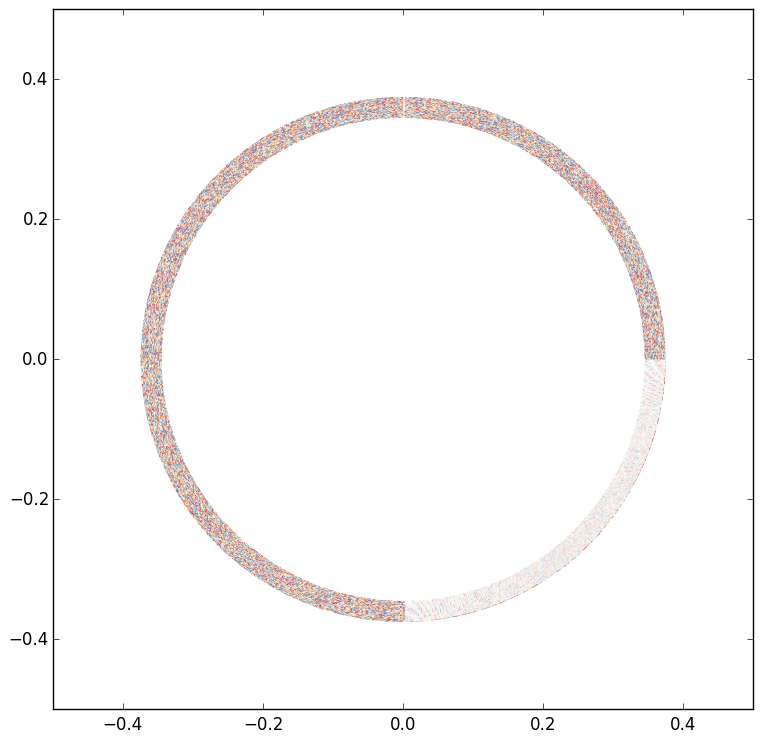

(-0.5,0.5)

LoadError: cmapper not defined
while loading In[18], in expression starting on line 3

In [21]:
pts = cellPoints[1,:,2:3]

1x4x2 Array{Float64,3}:
[:, :, 1] =
 -0.374243  -0.37425  -0.374993  -0.375

[:, :, 2] =
 0.00235147  0.0  0.00235618  0.0

In [22]:
squeeze(pts,1)'

2x4 Array{Float64,2}:
 -0.374243    -0.37425  -0.374993    -0.375
  0.00235147   0.0       0.00235618   0.0  

In [23]:
rand(4,2)

4x2 Array{Float64,2}:
 0.000846114  0.953255 
 0.980492     0.0376484
 0.513437     0.962687 
 0.709759     0.379637 

In [24]:
cm = plt.get_cmap("RdYlBu")
cm

In [25]:
cmap = mpl.pymember("cm")

PyObject <module 'matplotlib.cm' from '/usr/local/lib/python2.7/site-packages/matplotlib/cm.pyc'>

In [26]:
cmap2 = mpl.pymember("cm")

PyObject <module 'matplotlib.cm' from '/usr/local/lib/python2.7/site-packages/matplotlib/cm.pyc'>

In [27]:
cmap2[:hot]

In [28]:
RdYlBu = readcsv("RdYlBu.csv");
function cmapper(cmap,val)
    squeeze(cmap[min(max(ceil(val*255),1),255),:],1)
end

cmapper (generic function with 1 method)

In [29]:
cmapper(RdYlBu,0.0)

4-element Array{Float64,1}:
 0.647059
 0.0     
 0.14902 
 1.0     

In [30]:
rand()

0.46165944582811935

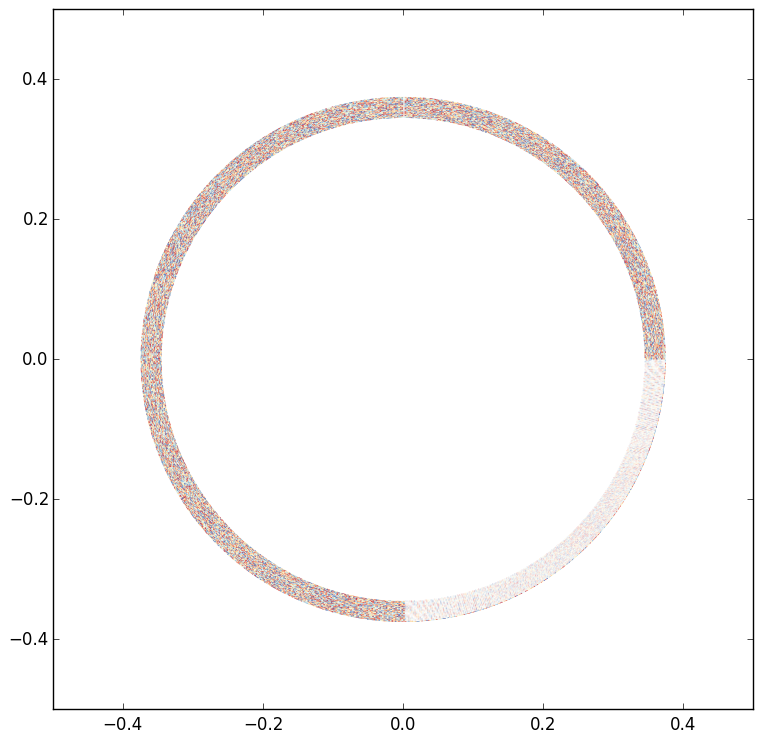

(-0.5,0.5)

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
for cellID in 1:40000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[[1,2,4,3],:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,rand()),rasterized=true)
    ax[:add_patch](p)
end
ax[:set_xlim]([-1,1]*0.5)
ax[:set_ylim]([-1,1]*0.5)
# ax[:set_xlim]([-.38,-.34])
# ax[:set_ylim]([0,.04])

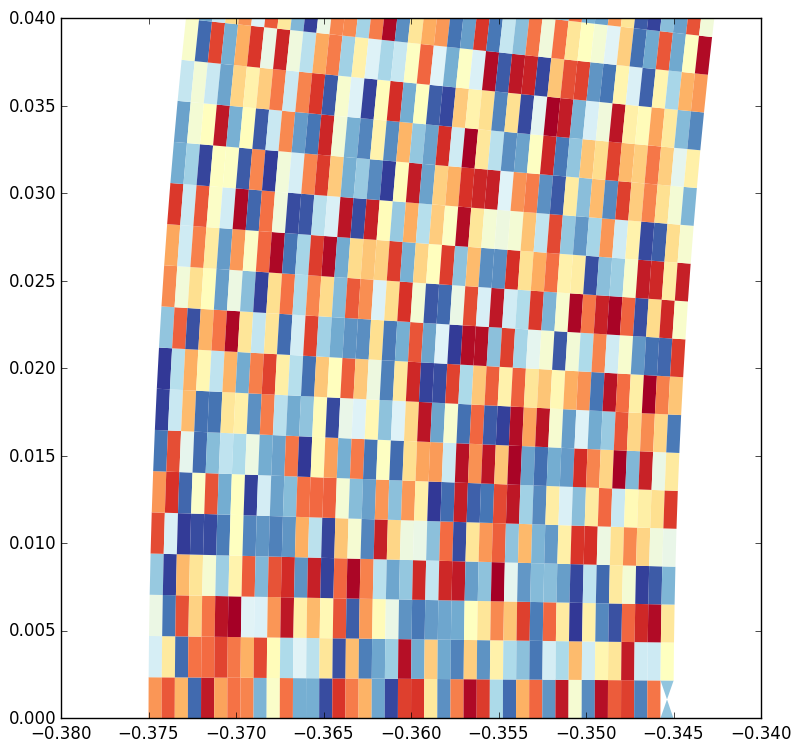

(0.0,0.04)

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
for cellID in 1:800
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[[1,2,4,3],:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,rand()),rasterized=true)
    ax[:add_patch](p)
end
# ax[:set_xlim]([-1,1]*0.5)
# ax[:set_ylim]([-1,1]*0.5)
ax[:set_xlim]([-.38,-.34])
ax[:set_ylim]([0,.04])

In [35]:
T = readVar(baseCase,"17","T")
U = readVar(baseCase,"17","U")
U[2:3,39000:39050]

2x51 Array{Float64,2}:
  0.0040634     0.00518096    0.012475   …   0.038762     0.0406054 
 -0.000646344  -0.000816823  -0.0019567     -0.00561171  -0.00585852

In [36]:
println(U[1:3,1:10])

[-9.59336e-32 0.0 2.60537e-31 2.60429e-31 0.0 -1.94959e-32 0.0 1.28626e-31 1.33332e-31 0.0
 0.000118812 8.77659e-5 0.000219492 0.000193236 0.000214014 0.000155261 0.000135551 7.71902e-5 2.12831e-5 -4.87527e-5
 0.0289138 0.0561036 0.0640285 0.0619409 0.0556734 0.0485536 0.0422814 0.0374883 0.0341126 0.0317665]


In [37]:
Umag = sqrt(sum(U[2:3,:].^2,1))

1x40000 Array{Float64,2}:
 0.028914  0.0561037  0.0640289  …  0.00913552  0.00542193  0.00172625

In [38]:
# newT = squeeze(T,1)
Tminmax = (minimum(T)+10,maximum(T)-10)
Tdiff = Tminmax[2]-Tminmax[1]
Uminmax = (minimum(Umag),maximum(Umag))
Udiff = Uminmax[2]-Uminmax[1]

0.07427224422634869

In [39]:
Tsquashed = (squeeze(T,1)-Tminmax[1])/Tdiff
Usquashed = (Umag-Uminmax[1])/Udiff

1x40000 Array{Float64,2}:
 0.38925  0.755331  0.862036  0.833927  …  0.122952  0.0729527  0.0231942

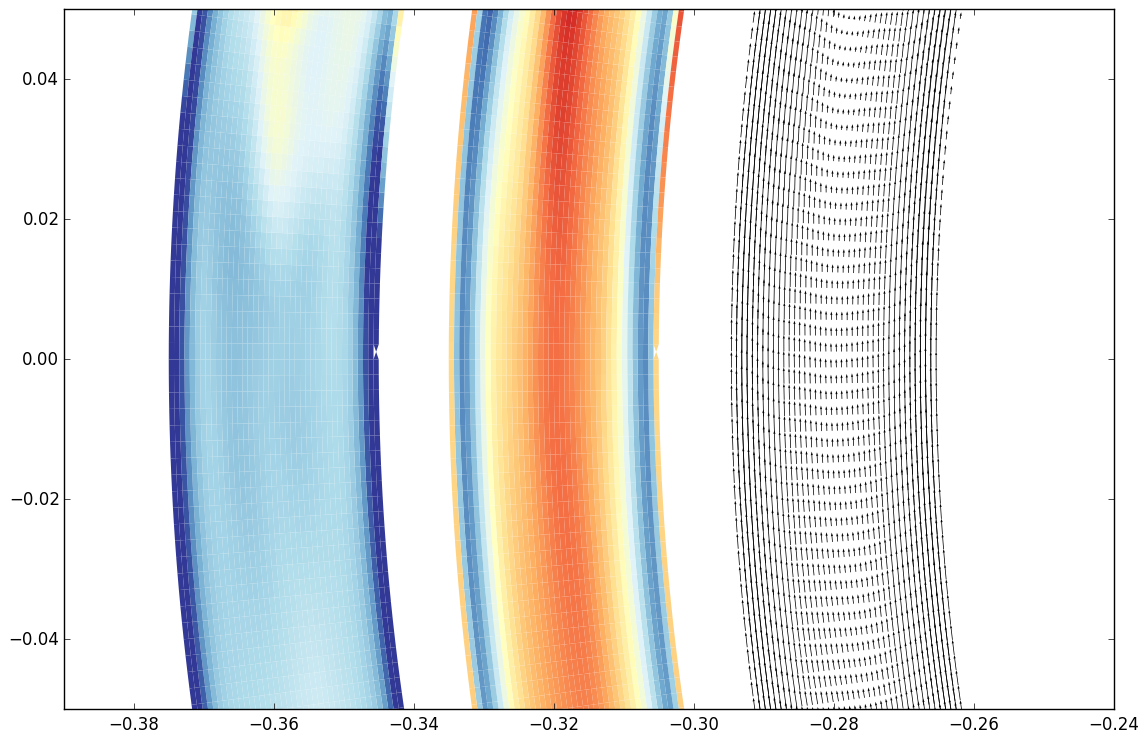

(-0.05,0.05)

In [40]:
fig = plt.figure(figsize=(15,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
offset = zeros(4,2)
offset[:,1] = .04
for cellID in 1:1000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[[1,2,4,3],:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
    p = patches[:Polygon](squeeze(pts,1)[[1,2,4,3],:]+offset,closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Usquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:quiver](baseCase.fullMesh["cellCenters"][2,1:1000]+0.08,baseCase.fullMesh["cellCenters"][3,1:1000],U[2,1:1000],U[3,1:1000],width=0.0007)
for cellID in 10000:11000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[[1,2,4,3],:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
    p = patches[:Polygon](squeeze(pts,1)[[1,2,4,3],:]+offset,closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Usquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:quiver](baseCase.fullMesh["cellCenters"][2,10000:11000]+0.08,baseCase.fullMesh["cellCenters"][3,10000:11000],U[2,10000:11000],U[3,10000:11000],width=0.0007)
# ax[:set_xlim]([-1,1]*0.5)
# ax[:set_ylim]([-1,1]*0.5)
ax[:set_xlim]([-.39,-.24])
ax[:set_ylim]([-0.05,.05])

In [180]:
T = readVar(baseCase,"8815","T")
U = readVar(baseCase,"8815","U")
Umag = sqrt(sum(U[2:3,:].^2,1))
Tminmax = (minimum(T)+10,maximum(T)-10)
Tdiff = Tminmax[2]-Tminmax[1]
Uminmax = (minimum(Umag),maximum(Umag))
Udiff = Uminmax[2]-Uminmax[1]
Tsquashed = (squeeze(T,1)-Tminmax[1])/Tdiff
Usquashed = (Umag-Uminmax[1])/Udiff

1x40000 Array{Float64,2}:
 0.204639  0.415666  0.508033  0.530428  …  0.168514  0.110889  0.0419161

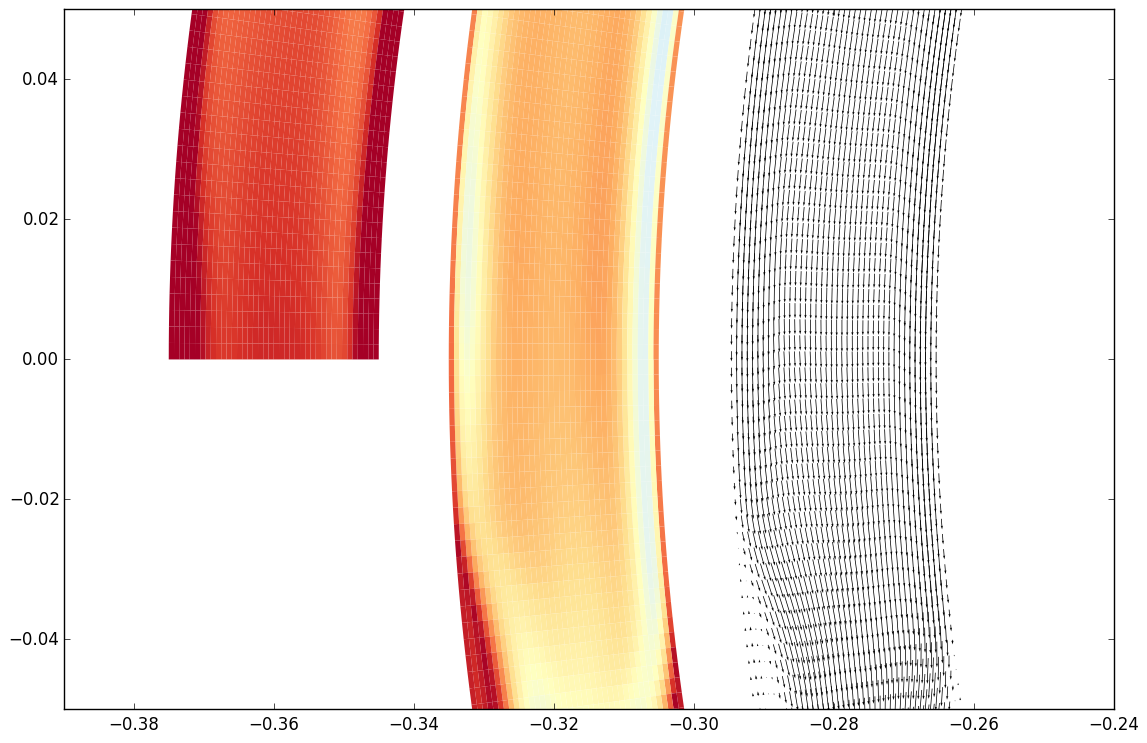

(-0.05,0.05)

In [248]:
fig = plt.figure(figsize=(15,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
offset = zeros(4,2)
offset[:,1] = .04
for cellID in 1:1000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:]+offset,closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Usquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:quiver](baseCase.fullMesh["cellCenters"][2,1:1000]+0.08,baseCase.fullMesh["cellCenters"][3,1:1000],U[2,1:1000],U[3,1:1000],width=0.0007)
for cellID in 10000:11000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    # p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    # ax[:add_patch](p)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:]+offset,closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Usquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:quiver](baseCase.fullMesh["cellCenters"][2,10000:11000]+0.08,baseCase.fullMesh["cellCenters"][3,10000:11000],U[2,10000:11000],U[3,10000:11000],width=0.0007)
# ax[:set_xlim]([-1,1]*0.5)
# ax[:set_ylim]([-1,1]*0.5)
ax[:set_xlim]([-.39,-.24])
ax[:set_ylim]([-0.05,.05])

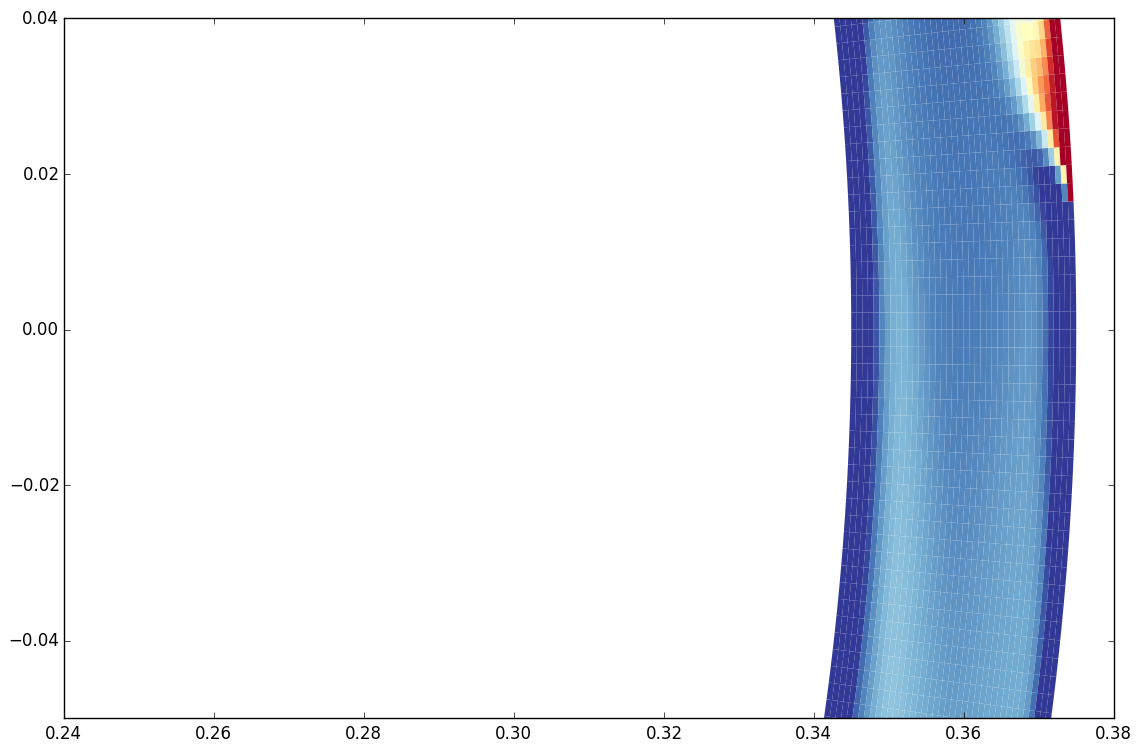

(-0.05,0.04)

In [249]:
fig = plt.figure(figsize=(15,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
offset = zeros(4,2)
offset[:,1] = .04
for cellID in 20000:21000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
for cellID in 30000:31000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:set_xlim]([.24,.38])
ax[:set_ylim]([-0.05,.04])

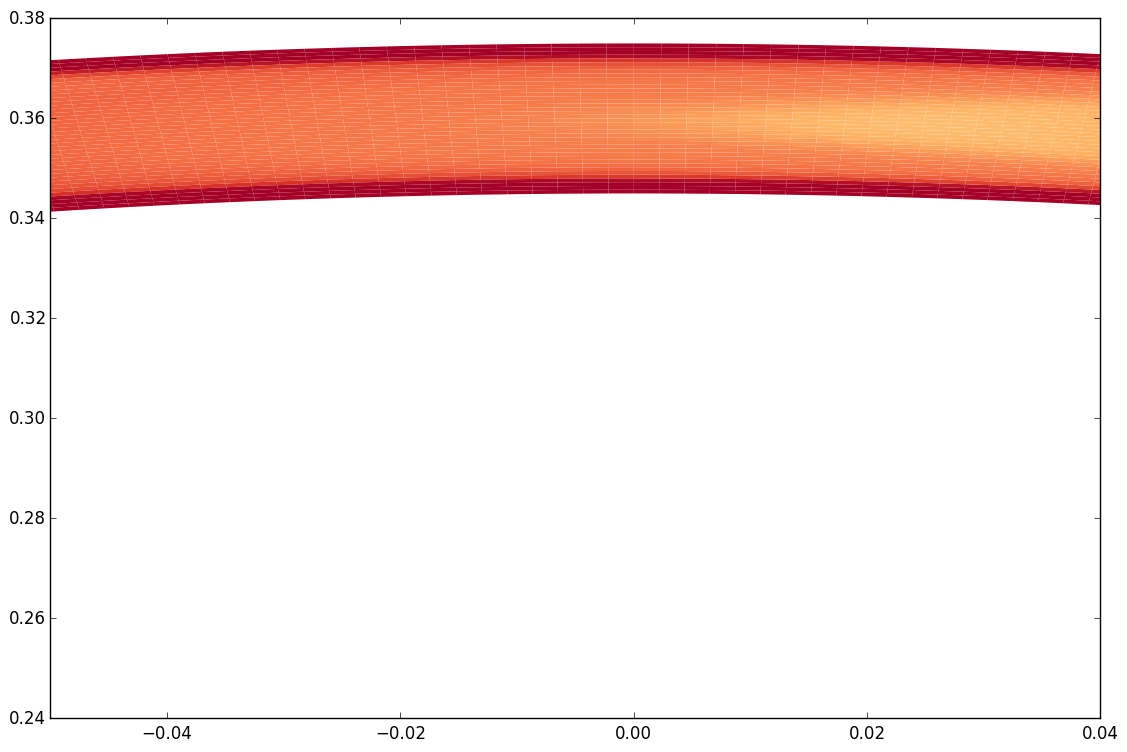

(-0.05,0.04)

In [250]:
fig = plt.figure(figsize=(15,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
offset = zeros(4,2)
offset[:,1] = .04
for cellID in 9000:10000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
for cellID in 39000:40000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:set_ylim]([.24,.38])
ax[:set_xlim]([-0.05,.04])

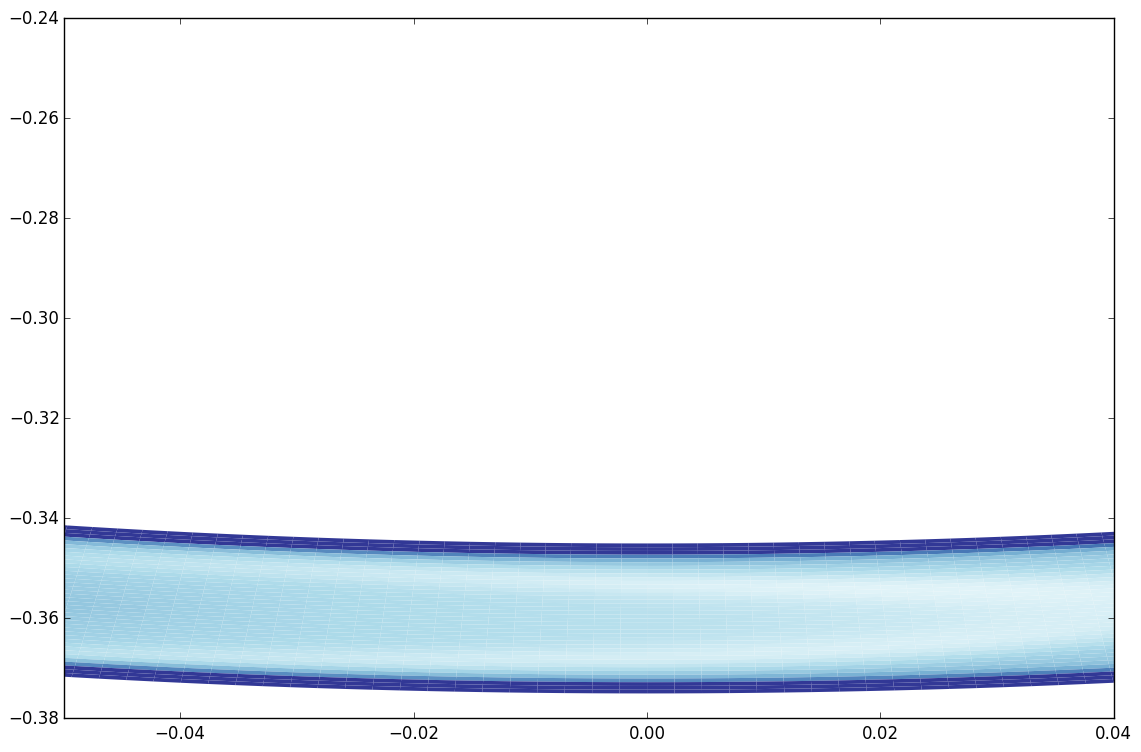

(-0.05,0.04)

In [251]:
fig = plt.figure(figsize=(15,10))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
offset = zeros(4,2)
offset[:,1] = .04
for cellID in 29000:30000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
for cellID in 19000:20000
    pts = cellPoints[cellID,:,2:3]
    # println(pts)
    p = patches[:Polygon](squeeze(pts,1)[cell_point_order(cellID),:],closed=true,edgecolor="none",facecolor=cmapper(RdYlBu,Tsquashed[cellID]),rasterized=true)
    ax[:add_patch](p)
end
ax[:set_ylim]([-.38,-.24])
ax[:set_xlim]([-0.05,.04])

In [247]:
lookup_table = zeros(40000,4)
lookup_table[1:19999,:] = repmat([1,2,4,3]',19999,1)
# bottom right
lookup_table[20000:30000,:] = repmat([1,2,3,4]',10001,1)
# flip every 40th
lookup_table[20000:40:29999,:] = repmat([1,2,4,3]',250,1)
lookup_table[30001:40000,:] = repmat([1,2,4,3]',10000,1)
lookup_table[40,:] = [1,2,3,4]'
lookup_table[39961:40000,:] = repmat([1,2,3,4]',40,1)
lookup_table[29961:29999,:] = repmat([1,2,4,3]',39,1)
# lookup_table[30000,:] = [1,2,3,4]'
function cell_point_order(cellID)
    # a lookup for how to reorder the point
    return squeeze(lookup_table[cellID,:],1)
end

cell_point_order (generic function with 1 method)

In [217]:
size(20000:40:29999)

(250,)

In [214]:
cell_point_order(10)

4-element Array{Float64,1}:
 1.0
 2.0
 4.0
 3.0

In [79]:
x = 1000; y = 40;
theta = [y for y in 2*pi/x/2:2*pi/x:2*pi-2*pi/x/2];

In [80]:
theta[1:10]


10-element Array{Any,1}:
 0.00314159
 0.00942478
 0.015708  
 0.0219911 
 0.0282743 
 0.0345575 
 0.0408407 
 0.0471239 
 0.0534071 
 0.0596903 

In [81]:
function atan3(x,y)
    # like atan2, but go counterclockwise
    # from the left hand side (to always get a positive theta)
    th = atan2(x,y)
    # wrap around
    if th<0
        th = th+2*pi
    end
    th
end


atan3 (generic function with 1 method)

In [98]:
# slice 0
i = 499;
# find the theta of that slice
# which is the points for points[i,:]
points[i+1,:]


1x40 Array{Int64,2}:
 40  39  38  37  36  35  34  33  32  31  …  11  10  9  8  7  6  5  4  3  2  1

In [99]:
# so we'll look at the indices of these points
indices[squeeze(points[i+1,:],1),:]

40x2 Array{Int64,2}:
 500  40
 500  39
 500  38
 500  37
 500  36
 500  35
 500  34
 500  33
 500  32
 500  31
 500  30
 500  29
 500  28
   ⋮    
 500  12
 500  11
 500  10
 500   9
 500   8
 500   7
 500   6
 500   5
 500   4
 500   3
 500   2
 500   1

In [100]:
# of course, I got back i+1 the LHS.
# but if I had more points, like 
zone_size = 5
points[i+1:i+zone_size,:]


5x40 Array{Int64,2}:
    40     39     38     37     36  …      5      4      3      2      1
 10001  10002  10003  10004  10005     10036  10037  10038  10039  10040
 10041  10042  10043  10044  10045     10076  10077  10078  10079  10080
 10081  10082  10083  10084  10085     10116  10117  10118  10119  10120
 10121  10122  10123  10124  10125     10156  10157  10158  10159  10160

In [101]:
reshape(points[i+1:i+zone_size,:],y*zone_size)


200-element Array{Int64,1}:
    40
 10001
 10041
 10081
 10121
    39
 10002
 10042
 10082
 10122
    38
 10003
 10043
     ⋮
 10118
 10158
     2
 10039
 10079
 10119
 10159
     1
 10040
 10080
 10120
 10160

In [102]:
indices[reshape(points[i+1:i+zone_size,:],y*zone_size),1]


200-element Array{Int64,1}:
 500
 501
 502
 503
 504
 500
 501
 502
 503
 504
 500
 501
 502
   ⋮
 503
 504
 500
 501
 502
 503
 504
 500
 501
 502
 503
 504

In [103]:
mean(indices[reshape(points[i+1:i+zone_size,:],y*zone_size),1],1)


1-element Array{Float64,1}:
 502.0

In [106]:
# now this is the angle
my_angle = mean(indices[reshape(points[i+1:i+zone_size,:],y*zone_size),1],1)/x*(2*pi)


1-element Array{Float64,1}:
 3.15416

In [107]:
# the left-hand tangent will be this + pi/2
my_tangent = mod(my_angle+pi/2,2*pi)


1-element Array{Float64,1}:
 4.72496

In [116]:
velocities = U[2:3,reshape(points[i+1:i+zone_size,:],y*zone_size)]


2x200 Array{Float64,2}:
 0.0840551  0.0729011  0.0700072  …  -0.11247  -0.0639942  -0.0497852
 1.0116     0.843937   0.726503       1.17478   0.877402    0.795779 

In [94]:
points[i+1:i+zone_size,:]


5x40 Array{Int64,2}:
 30001  30002  30003  30004  30005  …  30036  30037  30038  30039  30040
 30041  30042  30043  30044  30045     30076  30077  30078  30079  30080
 30081  30082  30083  30084  30085     30116  30117  30118  30119  30120
 30121  30122  30123  30124  30125     30156  30157  30158  30159  30160
 30161  30162  30163  30164  30165     30196  30197  30198  30199  30200

In [109]:
# create a unit vector with angle my_tangent, which to project these velocities onto
my_vec = [cos(my_tangent),sin(my_tangent)]

2-element Array{Float64,1}:
  0.012566
 -0.999921

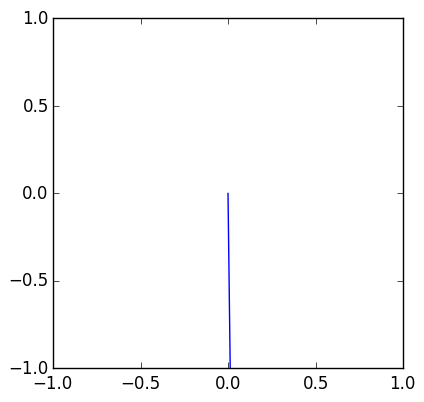

(-1,1)

In [113]:
fig = plt.figure(figsize=(5,5))
ax = fig[:add_axes]([0.2,0.2,0.7,0.7])
ax[:plot]([0,my_vec[1]],[0,my_vec[2]])
ax[:set_ylim]([-1,1])
ax[:set_xlim]([-1,1])

In [115]:
norm(my_vec)

0.9999999999999999

In [129]:
dot(velocities[:,1],my_vec)

-1.0104638885775812

In [135]:
alldots = zeros(200)
for i=1:200
    alldots[i] = dot(velocities[:,i],my_vec)
end

In [137]:
alldots

200-element Array{Float64,1}:
 -1.01046 
 -0.842954
 -0.725566
 -0.663798
 -0.6175  
 -0.884367
 -0.735718
 -0.681534
 -0.651474
 -0.619927
 -0.751818
 -0.666753
 -0.650745
  ⋮       
 -1.31294 
 -1.13399 
 -1.47001 
 -2.19159 
 -1.39851 
 -1.00938 
 -0.886962
 -2.78807 
 -1.88218 
 -1.1761  
 -0.878137
 -0.796342

In [148]:
avg_vel = mean(alldots)

-0.17792795057271907

In [153]:
max_vel = 1.0
shift = floor(avg_vel/max_vel*zone_size)

-1.0

In [194]:
function compute_shift(i,indices,points,x,y,U,zone_size,max_vel)
    # will shift up the zone size, requiring a velocity
    # of max_vel to make that shift
    
    # compute the angle around the loop of zone i
    # turning counterclockwise starting on the RHS
    my_angle = mean(indices[reshape(points[i+1:i+zone_size,:],y*zone_size),1],1)/x*(2*pi)
    println("my angle is $(my_angle)")
    # this is the tangent to that, turning counterclockwise
    my_tangent = mod(my_angle+pi/2,2*pi)
    println("my tangent is $(my_tangent)")
    
    # unit vector tangent toangle around loop
    my_vec = [cos(my_tangent),sin(my_tangent)]
    
    # pull the velocities out of U
    velocities = U[2:3,reshape(points[i+1:i+zone_size,:],y*zone_size)]
    
    # project each velocity onto the tangent
    alldots = zeros(200)
    for i=1:200
        alldots[i] = dot(velocities[:,i],my_vec)
    end
    # println(alldots)
    
    # take the average velocity
    avg_vel = mean(alldots)
    
    # compute the shift
    shift = round(avg_vel/max_vel*zone_size)
    println(shift)
    # bound it
    shift = min(shift,zone_size)
    shift = max(shift,-zone_size)
    return shift
end

compute_shift (generic function with 3 methods)

In [196]:
compute_shift(0,indices,points,x,y,U,zone_size,.01)

my angle is [0.01884955592153876]
my tangent is [1.589645882716435]
14.0


5.0

In [197]:
compute_shift(20,indices,points,x,y,U,zone_size,.01)

my angle is [0.1445132620651305]
my tangent is [1.715309588860027]
14.0


5.0

In [198]:
compute_shift(499,indices,points,x,y,U,zone_size,.01)

my angle is [3.1541590242041524]
my tangent is [4.72495535099905]
14.0


5.0

In [199]:
compute_shift(990,indices,points,x,y,U,zone_size,.01)

my angle is [6.239203010029329]
my tangent is [1.5268140296446395]
14.0


5.0